In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from General import *
from ReadingTheDataUtils import *
from Classifiers import *
from PreproccesUtils import *

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

2019-10-11 12:20:55,241 - DEBUG - MainThread - Classifiers - <module> - First time initialize logger!


In [3]:
from pathlib import Path

ROOT_PATH = Path('..')
SRC_PATH = Path('.')
DATA_PATH = ROOT_PATH / 'data'
CSV_PATH = DATA_PATH / 'ExtraSensory.per_uuid_features_labels'
CSV_SUFFIX = '.features_labels.csv'
ORIGINAL_LABLES_CSV_PATH = DATA_PATH / 'ExtraSensory.per_uuid_original_labels'
ORIGINAL_LABLES_CSV_SUFFIX = '.original_labels.csv'
FOLD_PATH = DATA_PATH / 'cv_5_folds'

# Data Exploration

In [4]:
data = pd.read_csv(DATA_PATH / 'dataset.csv', index_col='uuid')

In [5]:
data.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,discrete:time_of_day:between0and6,discrete:time_of_day:between3and9,discrete:time_of_day:between6and12,discrete:time_of_day:between9and15,discrete:time_of_day:between12and18,discrete:time_of_day:between15and21,discrete:time_of_day:between18and24,discrete:time_of_day:between21and3,label,label_name
uuid,,,,,,,,,,,,,,,,,,,,,
00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,original_label:SITTING
00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,original_label:SITTING
00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,original_label:SITTING
00EABED2-271D-49D8-B599-1D4A09240601,1444079341,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,6.684605,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,original_label:SITTING
00EABED2-271D-49D8-B599-1D4A09240601,1444079431,0.997371,0.037653,0.043389,0.102332,0.995548,0.996860,0.998205,0.460806,6.683904,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,original_label:SITTING


In [6]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 377346 entries, 00EABED2-271D-49D8-B599-1D4A09240601 to FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF
Data columns (total 228 columns):
timestamp                                                                  377346 non-null int64
raw_acc:magnitude_stats:mean                                               377056 non-null float64
raw_acc:magnitude_stats:std                                                377056 non-null float64
raw_acc:magnitude_stats:moment3                                            377056 non-null float64
raw_acc:magnitude_stats:moment4                                            377056 non-null float64
raw_acc:magnitude_stats:percentile25                                       377056 non-null float64
raw_acc:magnitude_stats:percentile50                                       377056 non-null float64
raw_acc:magnitude_stats:percentile75                                       377056 non-null float64
raw_acc:magnitude_stats:value_entropy 

In [7]:
data['label'] = data['label'].astype('category')

for col in data.columns:
    if col.startswith('dicrete'):
        data[col] = data[col].astype('category')  

# Model 

### Learn all classifiers by folds 

In [8]:
train_folds_list, test_folds_list = get_folds_list(FOLD_PATH)

train_folds_list
test_folds_list

[['33A85C34-CFE4-4732-9E73-0A7AC861B27A',
  '40E170A7-607B-4578-AF04-F021C3B0384A',
  '481F4DD2-7689-43B9-A2AA-C8772227162B',
  '4E98F91F-4654-42EF-B908-A3389443F2E7',
  '59818CD2-24D7-4D32-B133-24C2FE3801E5',
  '59EEFAE0-DEB0-4FFF-9250-54D2A03D0CF2',
  '61359772-D8D8-480D-B623-7C636EAD0C81',
  '665514DE-49DC-421F-8DCB-145D0B2609AD',
  '74B86067-5D4B-43CF-82CF-341B76BEA0F4',
  '797D145F-3858-4A7F-A7C2-A4EB721E133C',
  '806289BC-AD52-4CC1-806C-0CDB14D65EB6',
  '81536B0A-8DBF-4D8A-AC24-9543E2E4C8E0',
  '86A4F379-B305-473D-9D83-FC7D800180EF',
  '96A358A0-FFF2-4239-B93E-C7425B901B47',
  '99B204C0-DD5C-4BB7-83E8-A37281B8D769',
  'A5A30F76-581E-4757-97A2-957553A2C6AA',
  'A7599A50-24AE-46A6-8EA6-2576F1011D81',
  'B7F9D634-263E-4A97-87F9-6FFB4DDCB36C',
  'BEF6C611-50DA-4971-A040-87FB979F3FC1',
  'CCAF77F0-FABB-4F2F-9E24-D56AD0C5A82F',
  'F50235E0-DD67-4F2A-B00B-1F31ADA998B9',
  '2C32C23E-E30C-498A-8DD2-0EFB9150A02E',
  '3600D531-0C55-44A7-AE95-A7A38519464E',
  '4FC32141-E888-4BFF-8804-12559A4

[['0BFC35E2-4817-4865-BFA7-764742302A2D',
  '0E6184E1-90C0-48EE-B25A-F1ECB7B9714E',
  '1155FF54-63D3-4AB2-9863-8385D0BD0A13',
  '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842',
  '27E04243-B138-4F40-A164-F40B60165CF3',
  '00EABED2-271D-49D8-B599-1D4A09240601',
  '098A72A5-E3E5-4F54-A152-BBDA0DF7B694',
  '0A986513-7828-4D53-AA1F-E02D6DF9561B',
  '11B5EC4D-4133-4289-B475-4E737182A406',
  '136562B6-95B2-483D-88DC-065F28409FD2',
  '1538C99F-BA1E-4EFB-A949-6C7C47701B20',
  '24E40C4C-A349-4F9F-93AB-01D00FB994AF'],
 ['33A85C34-CFE4-4732-9E73-0A7AC861B27A',
  '40E170A7-607B-4578-AF04-F021C3B0384A',
  '481F4DD2-7689-43B9-A2AA-C8772227162B',
  '4E98F91F-4654-42EF-B908-A3389443F2E7',
  '59818CD2-24D7-4D32-B133-24C2FE3801E5',
  '2C32C23E-E30C-498A-8DD2-0EFB9150A02E',
  '3600D531-0C55-44A7-AE95-A7A38519464E',
  '4FC32141-E888-4BFF-8804-12559A491D8C',
  '5119D0F8-FCA8-4184-A4EB-19421A40DE0D',
  '5152A2DF-FAF3-4BA8-9CA9-E66B32671A53',
  '5EF64122-B513-46AE-BCF1-E62AAC285D2C',
  '61976C24-1C50-4355-9C49-AAE44A

# Single Fold

In [9]:
%%time
classifiers = dict()

for train_fold_lst, test_fold_lst in zip(train_folds_list, test_folds_list):
    # Preprocess the data
    train_fold_df, test_fold_df = get_folds_train_and_test(data, train_fold_lst, test_fold_lst)
    X_fold_train, X_fold_test, y_fold_train, y_fold_test = \
                split_fold_data_to_features_and_labels(train_fold_df, test_fold_df)
    standard_X_train, standard_X_test = standard_data_scaling(X_fold_train, X_fold_test)
        
    handle_nulls_in_X(standard_X_train, standard_X_test)
    
    # Learn all models sync
#     models_tuple =learn_all_models_sync(standard_X_train, y_fold_train)

    # Learn all model async
    models_tuple = learn_all_models_async(standard_X_train, y_fold_train, False)
    
    # Put each fold result in the classifiers dict
    classifiers.setdefault('single_sensor_classifier', []).append(models_tuple[0])
    classifiers.setdefault('early_fusion_classifier', []).append(models_tuple[1])
    
    # TODO: condiser to move the code acove to pycharm
    # Get predictions
    single_sensor_models = classifiers['single_sensor_classifier'][0]
    number_of_labels = len(y_fold_test.unique())
    get_LFA_predictions(standard_X_test, single_sensor_models, number_of_labels)
    
    # TODO: delete
#     break

2019-10-11 12:22:50,560 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - start single sensor model
2019-10-11 12:22:50,563 - DEBUG - MainThread - Classifiers - learn_all_models_async - waiting to: get_single_sensor_classifier
2019-10-11 12:22:50,564 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - inside the main loop
2019-10-11 12:22:50,567 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - Acc
2019-10-11 12:23:42,947 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - inside the main loop
2019-10-11 12:23:42,949 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - Gyro
2019-10-11 12:24:54,051 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - inside the main loop
2019-10-11 12:24:54,052 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - WAcc


2019-10-11 12:39:34,679 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - inside the main loop
2019-10-11 12:39:34,682 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - Acc
2019-10-11 12:40:14,078 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - inside the main loop
2019-10-11 12:40:14,080 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - Gyro
2019-10-11 12:41:22,630 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - inside the main loop
2019-10-11 12:41:22,631 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - WAcc
2019-10-11 12:42:16,176 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - inside the main loop
2019-10-11 12:42:16,180 - DEBUG - get_single_sensor_classifier - Classifiers - get_single_sensor_classifier - Loc
2019-10-11 12:42:3

In [10]:
classifiers

2019-10-11 12:43:43,608 - DEBUG - MainThread - Classifiers - <module> - First time initialize logger!


{'single_sensor_classifier': [{'Acc': LogisticRegression(C=1, class_weight='balanced', dual=False,
             fit_intercept=True, intercept_scaling=1, max_iter=1000,
             multi_class='warn', n_jobs=2, penalty='l2', random_state=None,
             solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
   'Gyro': LogisticRegression(C=1, class_weight='balanced', dual=False,
             fit_intercept=True, intercept_scaling=1, max_iter=1000,
             multi_class='warn', n_jobs=2, penalty='l2', random_state=None,
             solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
   'WAcc': LogisticRegression(C=1, class_weight='balanced', dual=False,
             fit_intercept=True, intercept_scaling=1, max_iter=1000,
             multi_class='warn', n_jobs=2, penalty='l2', random_state=None,
             solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
   'Loc': LogisticRegression(C=1, class_weight='balanced', dual=False,
             fit_intercept=True, inter

### LFA

In [14]:
single_sensor_models = classifiers['single_sensor_classifier'][4]
y_pred = np.zeros((standard_X_test.shape[0], 7))
feature_names = get_feature_names(standard_X_test, ['label'])  # In this case we using the data with just our label!
sensor_names = get_sensor_names(feature_names)

for sensor_name in single_sensor_models:
    model = single_sensor_models[sensor_name]
    feature_names = sensor_names[sensor_name]
    test = standard_X_test[feature_names]
    
    y_pred += model.predict_proba(test)
    
np.argmax(y_pred / len(sensor_names), axis=1)

# Pycharm function for the above code
get_LFA_predictions(standard_X_test, single_sensor_models, number_of_labels)

array([1, 1, 1, ..., 3, 4, 4], dtype=int64)

array([1, 1, 1, ..., 3, 4, 4], dtype=int64)

### LFL

In [90]:
single_sensor_models = classifiers['single_sensor_classifier'][4]
y_pred = np.zeros((standard_X_test.shape[0], 7))
feature_names = get_feature_names(standard_X_test, ['label'])  # In this case we using the data with just our label!
sensor_names = get_sensor_names(feature_names)
predictions_train = []
predictions_test = []

for sensor_name in single_sensor_models:
    model = single_sensor_models[sensor_name]
    feature_names = sensor_names[sensor_name]
    test = standard_X_train[feature_names]
    
    predictions_train.append(model.predict_proba(test))
    
# for sensor_name in single_sensor_models:
#     model = single_sensor_models[sensor_name]
#     feature_names = sensor_names[sensor_name]
#     test = standard_X_test[feature_names]
    
#     predictions_test.append(model.predict_proba(test))

In [130]:
models = []
predictions_train = np.array(predictions_train)

for i in range(7):
    X_train = predictions_train[:, :, i].T
    y_train = y_fold_train.apply(lambda x: 1 if x==i else 0)
    
    # Model params
    solver = 'lbfgs'
    max_iter = 1000
    class_weight = 'balanced'
    n_jobs = 2
    
    clf =LogisticRegression(
        solver=solver,
        max_iter=max_iter,
        class_weight=class_weight,
        n_jobs=n_jobs
    )
    
    clf.fit(X_train, y_train)
    
    models.append(clf)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=2, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=2, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=2, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=2, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=2, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=2, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=2, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [131]:
predictions_test = []

for sensor_name in single_sensor_models:
    model = single_sensor_models[sensor_name]
    feature_names = sensor_names[sensor_name]
    test = standard_X_test[feature_names]
    
    predictions_test.append(model.predict_proba(test))
    
predictions_test = np.array(predictions_test)

In [132]:
y_pred = []

for i, model in enumerate(models):
    X_test = predictions_test[:, :, i].T
    
    y_pred.append(model.predict_proba(X_test)[:, 1])
    
y_pred_proba = np.array(y_pred)

y_pred = np.argmax(y_pred_proba.T, axis=1)

<BarContainer object of 7 artists>

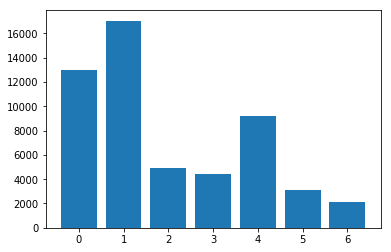

In [133]:
X, y = np.unique(y_pred, return_counts=True)

plt.bar(X, y)

<BarContainer object of 7 artists>

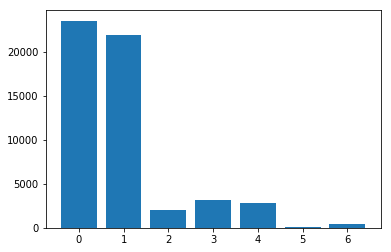

In [134]:
X, y = np.unique(y_fold_test.values, return_counts=True)

plt.bar(X, y)

In [135]:
from sklearn.metrics import f1_score

f1_score(y_fold_test, y_pred, average='macro')
f1_score(y_fold_test, y_pred, average='micro')

0.27215175441704814

0.46045828218576795

In [143]:
def get_stats(prediction, labels):
    """
    :param prediction: a numpy array with the prediction of the model
    :param labels: a numpy array with the target values (labels)
    :return: tpr: true positive rate
             fpr: false positive rate
             accuracy: accuracy of the model given the predictions
    """
    TP_indices = (prediction == 1) & (prediction == labels)
    FN_indices = (prediction == 0) & (prediction != labels)
    FP_indices = (prediction == 1) & (prediction != labels)
    TN_indices = (prediction == 0) & (prediction == labels)

    TP = prediction[TP_indices].shape[0]
    FN = prediction[FN_indices].shape[0]
    TN = prediction[TN_indices].shape[0]
    FP = prediction[FP_indices].shape[0]

    sensitivity = TP / (TP + FN)
    specifisity = 1 - (FP / (TN + FP))
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    BA = (sensitivity + specifisity) / 2
    precision = TP / (TP + FP)

    return sensitivity, specifisity, accuracy, BA, precision

In [144]:
sensitivity, specifisity, accuracy, BA, precision = get_stats(y_pred, y_fold_test)

sensitivity
specifisity
accuracy
BA
precision

0.863517060367454

0.6354108283824683

0.7280082573083838

0.7494639443749611

0.6180942875594434

In [148]:
from sklearn.metrics import precision_score

precision_score(y_fold_test, y_pred, average='micro')
precision_score(y_fold_test, y_pred, average='macro')

0.46045828218576795

0.28499373738458866